In [1]:
import pandas as pd
df = pd.read_excel("./OnlineRetail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
df = df[pd.notna(df['CustomerID'])]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


<AxesSubplot: >

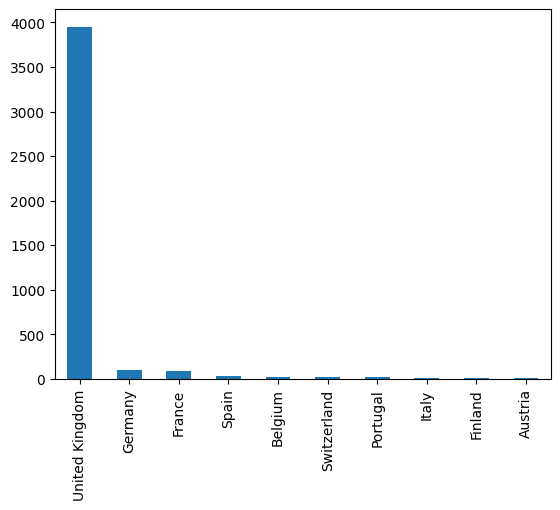

In [5]:
filtered_data = df[['Country','CustomerID']].drop_duplicates()
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
uk_data = df[df["Country"]=="United Kingdom"]


In [8]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [9]:
uk_data[['Quantity', 'UnitPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,361878.0,11.077029,263.129266,-80995.0,2.00,4.00,12.00,80995.0
UnitPrice,361878.0,3.256007,70.654731,0.0,1.25,1.95,3.75,38970.0


In [10]:
uk_data = uk_data[uk_data['Quantity']>0]

In [11]:
uk_data[['Quantity', 'UnitPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,354345.0,12.048913,190.428127,1.0,2.00,4.00,12.00,80995.00
UnitPrice,354345.0,2.963793,17.862067,0.0,1.25,1.95,3.75,8142.75


In [12]:
uk_data = uk_data[uk_data['UnitPrice']>0]

In [13]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392
std,189.267956,17.862655,1594.527150
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [14]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [15]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
uk_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [17]:
cols = ['CustomerID','InvoiceDate','InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice']
uk_data = uk_data[cols]

In [18]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [19]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   354321 non-null  float64       
 1   InvoiceDate  354321 non-null  datetime64[ns]
 2   InvoiceNo    354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   UnitPrice    354321 non-null  float64       
 5   TotalPrice   354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 18.9+ MB


In [20]:
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [21]:
PRESENT = uk_data['InvoiceDate'].max()

In [22]:
import datetime as dt

In [23]:
PRESENT = dt.datetime(PRESENT.year, PRESENT.month, PRESENT.day + 1)

In [24]:
PRESENT

datetime.datetime(2011, 12, 10, 0, 0)

In [25]:
uk_data.groupby('CustomerID')

### RFM Analysis

In [26]:
rfm = uk_data.groupby('CustomerID').agg(
    {
        'InvoiceDate' : lambda date : (PRESENT - date.max()).days,
        'InvoiceNo' : 'count',
        'TotalPrice' : 'sum'
        
    }
)

In [27]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [28]:
rfm = rfm.rename(columns={
    'InvoiceDate':'recency',
    'InvoiceNo':'frequency',
    'TotalPrice':'monetary'
    })
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [29]:
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(int)
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4595,33719
12749.0,3,199,4090
12820.0,3,59,942


In [30]:
rfm['r_quartile'] = pd.qcut(rfm['recency'],4, labels=['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'],4, labels=['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'],4, labels=['4','3','2','1'])

In [31]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,1,1,1
12748.0,0,4595,33719,1,1,1
12749.0,3,199,4090,1,1,1
12820.0,3,59,942,1,2,2
...,...,...,...,...,...,...
18280.0,277,10,180,4,4,4
18281.0,180,7,80,4,4,4
18282.0,7,12,178,1,4,4


In [32]:
rfm['rfm_score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,103,4196,1,1,1,111
12748.0,0,4595,33719,1,1,1,111
12749.0,3,199,4090,1,1,1,111
12820.0,3,59,942,1,2,2,122


In [33]:
rfm['rfm_score_value'] = rfm.r_quartile.astype(int) + rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,rfm_score_value
CustomerID,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9
12747.0,2,103,4196,1,1,1,111,3
12748.0,0,4595,33719,1,1,1,111,3
12749.0,3,199,4090,1,1,1,111,3
12820.0,3,59,942,1,2,2,122,5


In [34]:
rfm['rfm_score'].value_counts()

111    409
444    345
211    186
433    178
344    169
      ... 
241      7
141      5
431      4
413      4
114      1
Name: rfm_score, Length: 61, dtype: int64

In [35]:
def rfm_level(df):
    if df['rfm_score_value'] >=10:
        return 'low'
    elif (df['rfm_score_value']>=6) and (df['rfm_score_value']<10):
        return 'middle'
    else:
        return 'top'
rfm['rfm_level'] = rfm.apply(rfm_level,axis=1)

rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,rfm_score_value,rfm_level
CustomerID,,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9,middle
12747.0,2,103,4196,1,1,1,111,3,top
12748.0,0,4595,33719,1,1,1,111,3,top
12749.0,3,199,4090,1,1,1,111,3,top
12820.0,3,59,942,1,2,2,122,5,top


In [36]:
rfm.groupby('rfm_level').agg({'recency':'mean','frequency':'mean','monetary':'mean'})

,recency,frequency,monetary
rfm_level,,,
low,190.045918,14.948129,258.978741
middle,71.130299,49.714464,1059.508728
top,19.335088,225.438596,4651.303509


In [37]:
rfm['rfm_level'].value_counts()

middle    1604
low       1176
top       1140
Name: rfm_level, dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='monetary', ylabel='Count'>

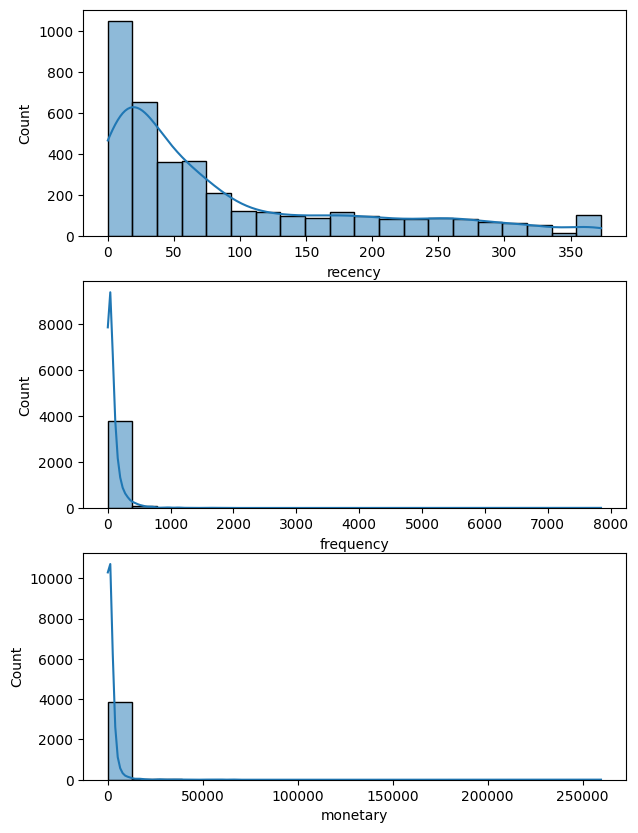

In [39]:
plt.figure(figsize=(7,10))
plt.subplot(3,1,1)
sns.histplot(rfm['recency'], kde=True,bins=20)

plt.subplot(3,1,2)
sns.histplot(rfm['frequency'], kde=True,bins=20)

plt.subplot(3,1,3)
sns.histplot(rfm['monetary'], kde=True,bins=20)

In [44]:
print('means: \n', rfm[['recency','frequency','monetary']].mean())
print('standard deviation: \n', rfm[['recency','frequency','monetary']].std())

means: 
 recency        91.742092
frequency      90.388010
monetary     1863.902296
dtype: float64
standard deviation: 
 recency        99.533485
frequency     217.808385
monetary     7482.810495
dtype: float64


In [51]:
rfm.index

Float64Index([12346.0, 12747.0, 12748.0, 12749.0, 12820.0, 12821.0, 12822.0,
              12823.0, 12824.0, 12826.0,
              ...
              18273.0, 18274.0, 18276.0, 18277.0, 18278.0, 18280.0, 18281.0,
              18282.0, 18283.0, 18287.0],
             dtype='float64', name='CustomerID', length=3920)

In [56]:
from scipy.stats import yeojohnson
df = pd.DataFrame()
df['CustomerID'] = rfm.index

cols = ['recency', 'frequency','monetary']
for col in cols:
    y, val = yeojohnson(rfm[col])
    df[col] = y

In [57]:
df

,CustomerID,recency,frequency,monetary
0,12346.0,9.481158,0.694879,7.350086
1,12747.0,1.200124,4.722890,6.042659
2,12748.0,0.000000,8.694125,7.009441
3,12749.0,1.550490,5.400640,6.029735
4,12820.0,1.550490,4.155270,5.241037
...,...,...,...,...
3915,18280.0,9.087391,2.418708,4.232856
3916,18281.0,8.074691,2.095081,3.690079
3917,18282.0,2.463324,2.588772,4.225597
3918,18283.0,1.550490,6.790070,5.681795


<AxesSubplot: xlabel='monetary', ylabel='Count'>

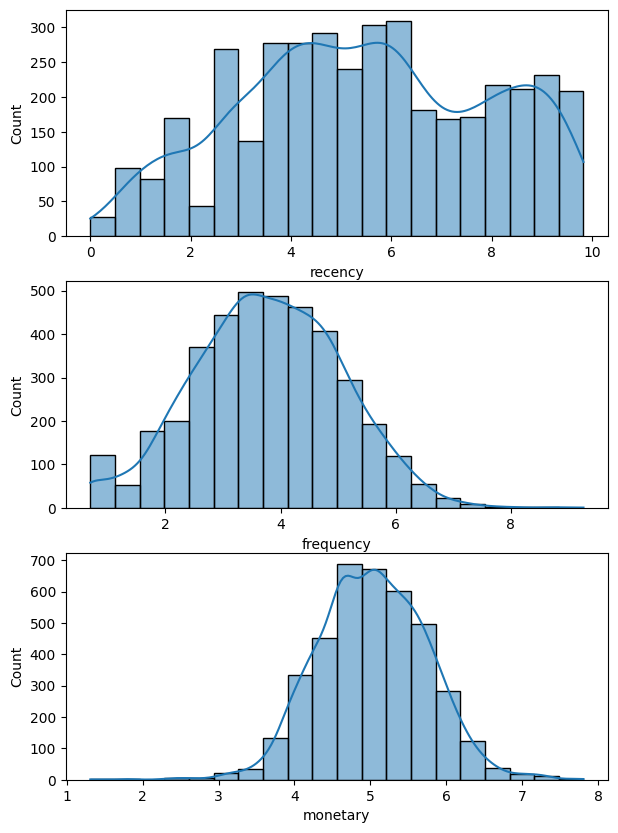

In [58]:
plt.figure(figsize=(7,10))
plt.subplot(3,1,1)
sns.histplot(df['recency'], kde=True,bins=20)

plt.subplot(3,1,2)
sns.histplot(df['frequency'], kde=True,bins=20)

plt.subplot(3,1,3)
sns.histplot(df['monetary'], kde=True,bins=20)

In [60]:
from sklearn.preprocessing import StandardScaler
df[cols] = StandardScaler().fit_transform(df[cols])
df

,CustomerID,recency,frequency,monetary
0,12346.0,1.623997,-2.382059,3.217645
1,12747.0,-1.738788,0.730526,1.405624
2,12748.0,-2.226138,3.799237,2.745530
3,12749.0,-1.596511,1.254246,1.387712
4,12820.0,-1.596511,0.291906,0.294620
...,...,...,...,...
3915,18280.0,1.464095,-1.049997,-1.102661
3916,18281.0,1.052855,-1.300074,-1.854921
3917,18282.0,-1.225824,-0.918582,-1.112723
3918,18283.0,-1.596511,2.327908,0.905487


<AxesSubplot: xlabel='monetary', ylabel='Count'>

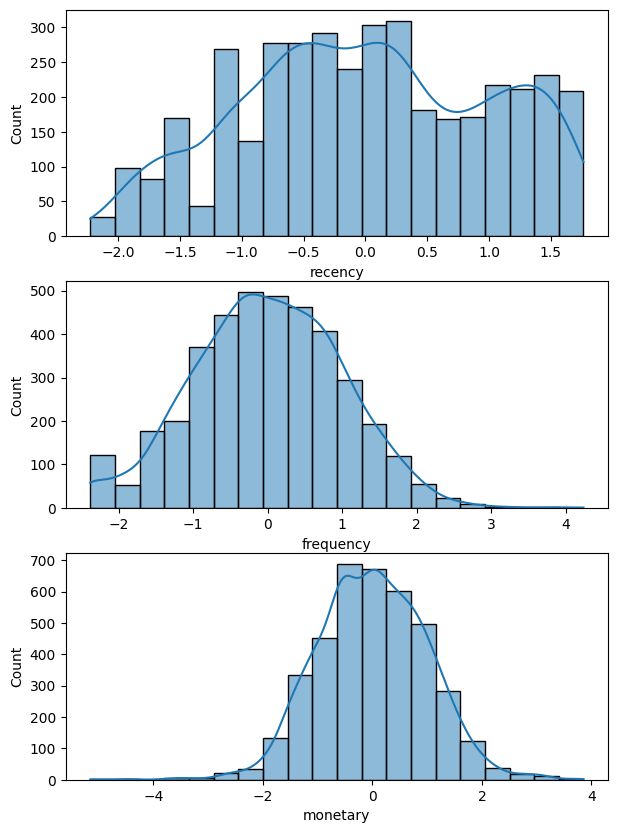

In [61]:
plt.figure(figsize=(7,10))
plt.subplot(3,1,1)
sns.histplot(df['recency'], kde=True,bins=20)

plt.subplot(3,1,2)
sns.histplot(df['frequency'], kde=True,bins=20)

plt.subplot(3,1,3)
sns.histplot(df['monetary'], kde=True,bins=20)

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df[cols])

C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [68]:
rfm['cluster_labels'] = kmeans.labels_
df['cluster_labels'] = kmeans.labels_

In [69]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,rfm_score_value,rfm_level,cluster_labels
CustomerID,,,,,,,,,,
12346.0,325,1,77183,4,4,1,441,9,middle,0
12747.0,2,103,4196,1,1,1,111,3,top,1
12748.0,0,4595,33719,1,1,1,111,3,top,1
12749.0,3,199,4090,1,1,1,111,3,top,1
12820.0,3,59,942,1,2,2,122,5,top,1
...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180,4,4,4,444,12,low,2
18281.0,180,7,80,4,4,4,444,12,low,2
18282.0,7,12,178,1,4,4,144,9,middle,0


In [70]:
df['cluster_labels'].value_counts()

0    1626
2    1217
1    1077
Name: cluster_labels, dtype: int64

In [72]:
rfm.columns

Index(['recency', 'frequency', 'monetary', 'r_quartile', 'f_quartile',
       'm_quartile', 'rfm_score', 'rfm_score_value', 'rfm_level',
       'cluster_labels'],
      dtype='object')

In [73]:
rfm.groupby('rfm_level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'})

,recency,frequency,monetary
rfm_level,,,
low,190.045918,14.948129,258.978741
middle,71.130299,49.714464,1059.508728
top,19.335088,225.438596,4651.303509


In [74]:
rfm.groupby('cluster_labels').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'})

,recency,frequency,monetary
cluster_labels,,,
0,65.700492,51.129766,928.947724
1,19.415970,234.941504,5076.235840
2,190.541495,14.915366,270.272802


In [81]:
import warnings
warnings.filterwarnings('ignore')
## Calculate sum of squared errors
intertias = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the normalized dataset
    kmeans.fit(df[cols])
    # Assign sum of squared distances to k element of dictionary
    intertias[k] = kmeans.inertia_

intertias

{1: 11760.0,
 2: 6080.574972038713,
 3: 4709.951483618821,
 4: 3870.1304068251625,
 5: 3319.482563122009,
 6: 2916.5138539892787,
 7: 2655.8572972261222,
 8: 2459.2442103128574,
 9: 2300.0016967139845,
 10: 2154.488755093133,
 11: 2016.7942700386984,
 12: 1896.6213109476041,
 13: 1814.3457251616694,
 14: 1733.1009034820422,
 15: 1664.5904333189962,
 16: 1597.9957152067796,
 17: 1531.5951055524383,
 18: 1489.2233277215505,
 19: 1436.2062858670693,
 20: 1382.858945804028}

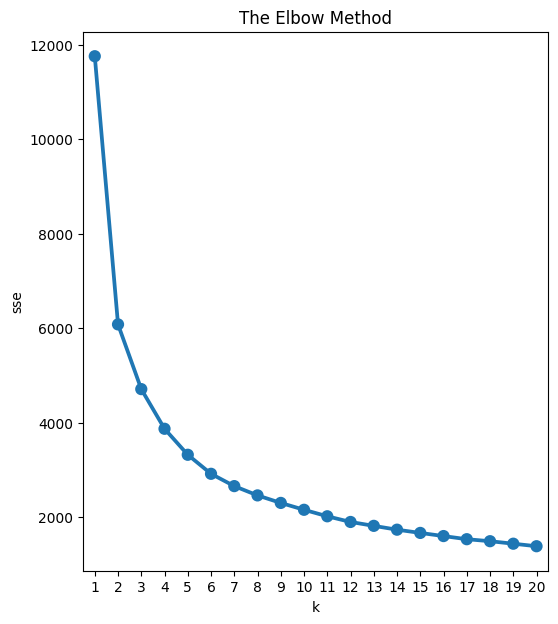

In [82]:
## Plot sum of squared errors
plt.figure(1 , figsize = (6, 7))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')
# Add X-axis label "k"
plt.xlabel('k')
# Add Y-axis label "SSE"
plt.ylabel('sse')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(intertias.keys()), y=list(intertias.values()))
plt.show()

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
points = pca.fit_transform(df[cols])
df['PC_1'] = points[:,0]
df['PC_2'] = points[:,1]
df

,CustomerID,recency,frequency,monetary,cluster_labels,PC_1,PC_2
0,12346.0,1.623997,-2.382059,3.217645,0,0.327714,-1.753878
1,12747.0,-1.738788,0.730526,1.405624,1,-2.186094,0.716162
2,12748.0,-2.226138,3.799237,2.745530,1,-5.116738,-0.440135
3,12749.0,-1.596511,1.254246,1.387712,1,-2.421442,0.416584
4,12820.0,-1.596511,0.291906,0.294620,1,-1.172165,1.160380
...,...,...,...,...,...,...,...
3915,18280.0,1.464095,-1.049997,-1.102661,2,2.056452,-0.480326
3916,18281.0,1.052855,-1.300074,-1.854921,2,2.455101,0.240264
3917,18282.0,-1.225824,-0.918582,-1.112723,0,0.608283,1.789371
3918,18283.0,-1.596511,2.327908,0.905487,1,-2.782606,0.218535


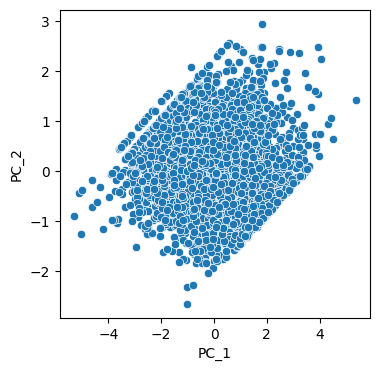

In [89]:
plt.figure(1 , figsize = (4, 4))
sns.scatterplot(x='PC_1', y='PC_2', data=df)
plt.show()

In [91]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df[cols])
# Extract cluster labels
rfm['cluster_labels'] = kmeans.labels_
df['cluster_labels'] = kmeans.labels_
df

,CustomerID,recency,frequency,monetary,cluster_labels,PC_1,PC_2
0,12346.0,1.623997,-2.382059,3.217645,0,0.327714,-1.753878
1,12747.0,-1.738788,0.730526,1.405624,2,-2.186094,0.716162
2,12748.0,-2.226138,3.799237,2.745530,2,-5.116738,-0.440135
3,12749.0,-1.596511,1.254246,1.387712,2,-2.421442,0.416584
4,12820.0,-1.596511,0.291906,0.294620,2,-1.172165,1.160380
...,...,...,...,...,...,...,...
3915,18280.0,1.464095,-1.049997,-1.102661,1,2.056452,-0.480326
3916,18281.0,1.052855,-1.300074,-1.854921,1,2.455101,0.240264
3917,18282.0,-1.225824,-0.918582,-1.112723,3,0.608283,1.789371
3918,18283.0,-1.596511,2.327908,0.905487,2,-2.782606,0.218535


In [92]:
rfm.cluster_labels.value_counts()

0    1086
1    1021
2     928
3     885
Name: cluster_labels, dtype: int64

In [93]:
rfm.groupby('cluster_labels').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'})

,recency,frequency,monetary
cluster_labels,,,
0,91.289134,76.705341,1426.325046
1,216.774731,15.449559,280.203722
2,12.912716,249.543103,5484.925647
3,30.710734,26.744633,430.970621


<AxesSubplot: xlabel='PC_1', ylabel='PC_2'>

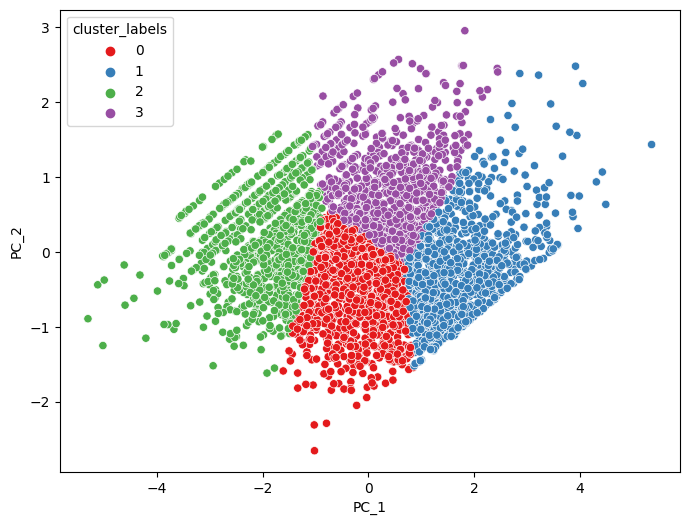

In [94]:
plt.figure(1 , figsize = (8, 6))
sns.scatterplot(x='PC_1', y='PC_2', hue='cluster_labels', data=df, palette="Set1")

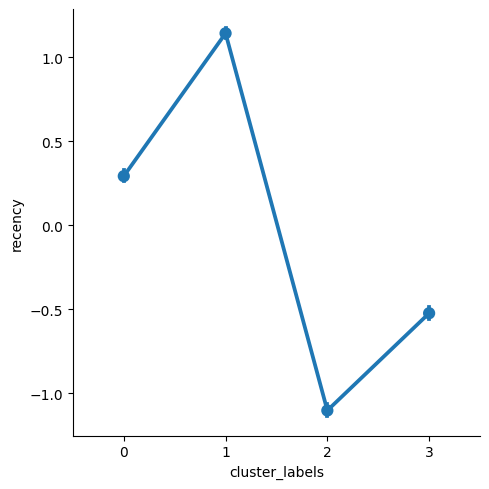

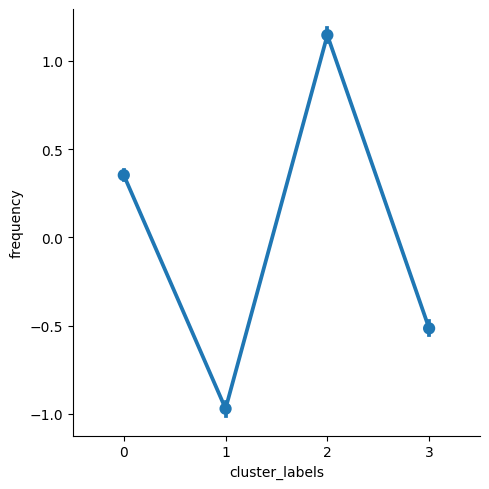

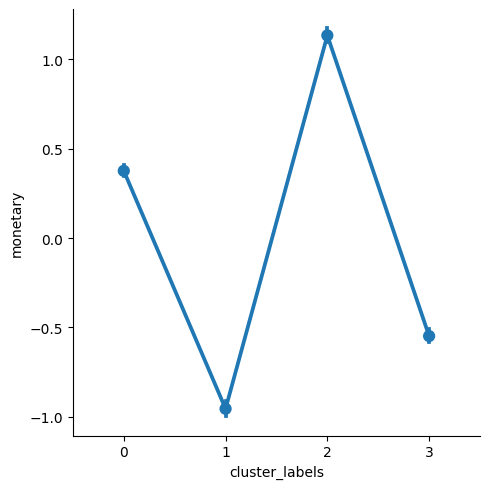

In [98]:
sns.catplot(x="cluster_labels", y="recency", kind="point", data=df)
sns.catplot(x="cluster_labels", y="frequency", kind="point", data=df)
sns.catplot(x="cluster_labels", y="monetary", kind="point", data=df)
plt.show()

In [112]:
# df_melt = df.melt(df,
#         id_vars=[['CustomerID','Cluster Labels']],
#         value_vars=cols,
#         value_name='metric',
#         var_name='value',
#         )
df_melt = pd.melt(df,
                    id_vars=['CustomerID', 'cluster_labels'],
                    value_vars=['recency', 'frequency', 'monetary'],
                    var_name='Metric', value_name='Value'
					)

In [113]:
df_melt

,CustomerID,cluster_labels,Metric,Value
0,12346.0,0,recency,1.623997
1,12747.0,2,recency,-1.738788
2,12748.0,2,recency,-2.226138
3,12749.0,2,recency,-1.596511
4,12820.0,2,recency,-1.596511
...,...,...,...,...
11755,18280.0,1,monetary,-1.102661
11756,18281.0,1,monetary,-1.854921
11757,18282.0,3,monetary,-1.112723
11758,18283.0,2,monetary,0.905487


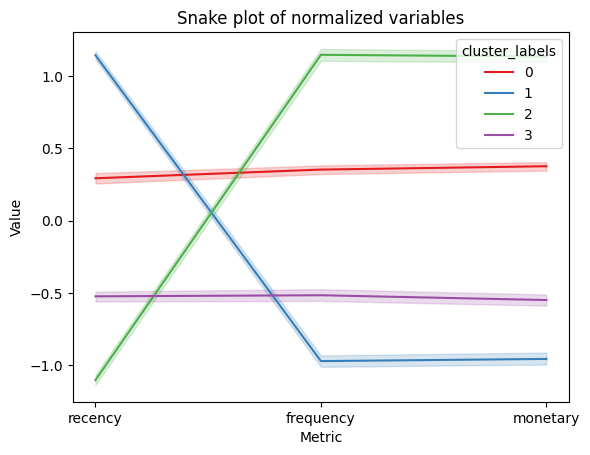

In [114]:
## Visualize snake plot

# Add the plot title
plt.title('Snake plot of normalized variables')
# Add the x axis label
plt.xlabel('Metric')
# Add they axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df_melt, x='Metric', y='Value', hue='cluster_labels', palette='Set1')
plt.show()